In [1]:
import requests
import json

In [2]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["name:en"="Taipei"];
(node["amenity"="bicycle_rental"]["operator:en"="YOUBIKE CO."](area);
 way["amenity"="bicycle_rental"]["operator:en"="YOUBIKE CO."](area);
 rel["amenity"="bicycle_rental"]["operator:en"="YOUBIKE CO."](area);
);
out center;
"""

In [3]:
response = requests.get(overpass_url, params={'data': overpass_query})
data_bike = response.json()

In [4]:
data_bike

{'version': 0.6,
 'generator': 'Overpass API 0.7.62.1 084b4234',
 'osm3s': {'timestamp_osm_base': '2024-07-22T07:20:00Z',
  'timestamp_areas_base': '2024-07-22T05:23:29Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 4751125733,
   'lat': 25.078202,
   'lon': 121.624493,
   'tags': {'alt_name': 'YouBike1.0_忠山市民活動中心',
    'alt_name:en': 'YouBike1.0_Jhongshan Civil Activity Center',
    'alt_name:zh': 'YouBike1.0_忠山市民活動中心',
    'alt_name:zh-Hans': 'YouBike1.0_忠山市民活动中心',
    'alt_name:zh-Hant': 'YouBike1.0_忠山市民活動中心',
    'alt_name:zh_pinyin': 'YouBike1.0_zhōngshānshìmínhuódòngzhōngxīn',
    'alt_name:zh_zhuyin': 'YouBike1.0_ㄓㄨㄥㄕㄢㄕˋㄇㄧㄣˊㄏㄨㄛˊㄉㄨㄥˋㄓㄨㄥㄒㄧㄣ',
    'amenity': 'bicycle_rental',
    'authentication:contactless': 'yes',
    'authentication:membership_card': 'yes',
    'bicycle_rental': 'docking_station',
    'brand': 'YouBike',
    'capacity': '36',
    'description':

In [5]:
# pip install numpy
# pip install matplotlib

In [6]:
import numpy as np
import matplotlib.pyplot as plt # 輸出圖表用

# Collect coords into list
coords = []
for element in data_bike['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

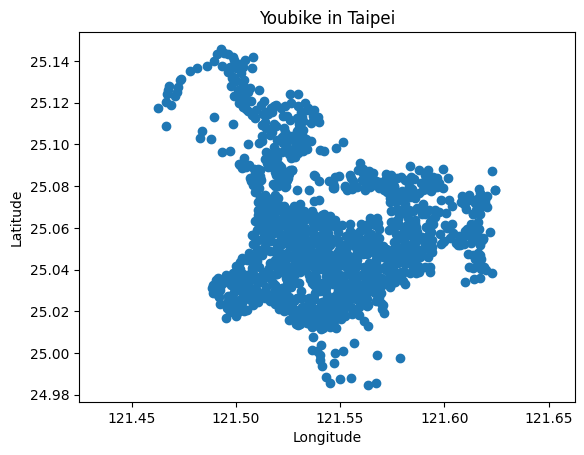

In [7]:
# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Youbike in Taipei')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [8]:
overpass_query = """
[out:json];
area["name:en"="Taipei"];
( 
node["railway"="station"]["station"="subway"](area);  // MRT
);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
data_MRT = response.json()
data_MRT

{'version': 0.6,
 'generator': 'Overpass API 0.7.62.1 084b4234',
 'osm3s': {'timestamp_osm_base': '2024-07-22T07:20:00Z',
  'timestamp_areas_base': '2024-07-22T06:22:43Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 253559357,
   'lat': 25.0205325,
   'lon': 121.5283902,
   'tags': {'addr:city': '臺北市',
    'addr:country': 'TW',
    'addr:district': '中正區',
    'addr:floor': '-1',
    'addr:housenumber': '126-5',
    'addr:postcode': '10089',
    'addr:street': '羅斯福路三段',
    'air_conditioning': 'yes',
    'is_in:zh': '台灣台北市',
    'name': '台電大樓',
    'name:en': 'Taipower Building',
    'name:hak': 'toiˇ tien tai leuˇ',
    'name:ja': '台湾電力ビル',
    'name:nan': 'Tâi-tiān Tōa-lâu',
    'name:nan-HJ': '臺電大樓',
    'name:nan-POJ': 'Tâi-tiān Tōa-lâu',
    'name:nan-TL': 'Tâi-tiān Tuā-lâu',
    'name:zh': '台電大樓',
    'name:zh-Hans': '台电大楼',
    'name:zh-Hant': '臺電大樓',
    'name:

In [9]:
# pip install --upgrade --force-reinstall geopandas

In [10]:
import geopandas as gpd
gdf = gpd.read_file("MRT_TP.geojson")
# Select some useful cols and print
cols = ['addr:city', 'addr:district', 'name', 'name:en','addr:street', 'addr:floor', 'wheelchair', 'toilets:wheelchair']
# Print only selected cols
gdf[cols].head(75)

addr:city addr:district      name                        name:en  \
0        臺北市           中正區      台電大樓              Taipower Building   
1        臺北市           北投區       新北投                      Xinbeitou   
2        臺北市           內湖區        西湖                           Xihu   
3        臺北市           文山區        辛亥                         Xinhai   
4        臺北市           文山區      萬芳醫院               Wanfang Hospital   
..       ...           ...       ...                            ...   
70       台北市           中正區       小南門                     Xiaonanmen   
71       臺北市           大安區      忠孝新生             Zhongxiao Xinsheng   
72       臺北市           松山區        松山                       Songshan   
73       臺北市           中正區      台北車站            Taipei main station   
74       臺北市           信義區  台北101/世貿  Taipei 101/World Trade Center   

   addr:street addr:floor wheelchair toilets:wheelchair  
0       羅斯福路三段         -1        yes                yes  
1          大業路       None        yes                yes  
2        內湖路一段       None       None               None  
3        辛亥路四段       None       None               None  
4        興隆路三段       None        yes               None  
..         ...        ...        ...                ...  
70        愛國西路         B1        yes               None  
71      新生南路一段       None    limited                yes  
72       八德路四段       None        yes               None  
73         鄭州路       None       None               None  
74       信義路五段         -1         no               None  

[75 rows x 8 columns]

In [11]:
overpass_query = """
[out:json];
area["name:en"="Taipei"];
( 
node["amenity"="bus_station"](area);
 way["amenity"="bus_station"](area);
 rel["amenity"="bus_station"](area);
);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
data_bus = response.json()
data_bus

{'version': 0.6,
 'generator': 'Overpass API 0.7.62.1 084b4234',
 'osm3s': {'timestamp_osm_base': '2024-07-22T07:20:00Z',
  'timestamp_areas_base': '2024-07-22T05:23:29Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 2147391026,
   'lat': 25.0636295,
   'lon': 121.5334732,
   'tags': {'amenity': 'bus_station',
    'brand': '飛狗巴士',
    'bus': 'yes',
    'name': '行天宮',
    'name:en': 'Xingtian Temple',
    'name:zh': '行天宮',
    'operator': '建明客運',
    'public_transport': 'station'}},
  {'type': 'node',
   'id': 2509668585,
   'lat': 25.084474,
   'lon': 121.5548022,
   'tags': {'amenity': 'bus_station',
    'bus': 'yes',
    'name': '捷運劍南路站(植福)',
    'public_transport': 'station'}},
  {'type': 'node',
   'id': 2620554680,
   'lat': 25.0267308,
   'lon': 121.5432161,
   'tags': {'addr:city': '臺北市',
    'addr:country': 'TW',
    'addr:district': '大安區',
    'addr:housenumbe

In [12]:
gde = gpd.read_file("bus_station.geojson")
# Select some useful cols and print
cols = ['addr:city', 'addr:district', 'name', 'name:en','addr:street', 'addr:postcode','description']
# Print only selected cols
gde[cols].head(9)

addr:city addr:district        name                          name:en  \
0      None          None         行天宮                  Xingtian Temple   
1      None          None  捷運劍南路站(植福)                             None   
2       臺北市           大安區     捷運科技大樓站  MRT Technology Building Station   
3       臺北市           文山區     統聯客運景美站                             None   
4      None          None       松山轉運站                             None   
5      None          None       南港展覽館                             None   
6      None          None   光華巴士天西調度站                             None   
7      None          None     南港轉運站西站                             None   
8       臺北市           萬華區     日統客運臺北站                             None   

  addr:street addr:postcode description  
0        None          None        None  
1        None          None        None  
2      復興南路二段           106  葛瑪蘭客運(往宜蘭)  
3  羅斯福路六段222巷         11674        None  
4        None          None        None  
5        None          None        None  
6        None          None        None  
7        None          None        None  
8      忠孝西路二段           108        None

In [13]:
# pip install folium

In [14]:
# Create a base map
import folium

public_transportation_map = folium.Map([25.0369, 121.5641], zoom_start=11, tiles="openstreetmap")

public_transportation_map

In [15]:
# add public transportations

for element in data_MRT['elements']:
    folium.Marker(location=[element['lat'],element['lon']], popup=element['tags'].get('name'),tooltip="Click",icon=folium.Icon(icon='train-subway', prefix='fa')).add_to(public_transportation_map)

for element in data_bus['elements']:
    folium.Marker(location=[element['lat'],element['lon']], popup=element['tags'].get('name'),tooltip="Click",icon=folium.Icon(icon='bus',color='red', prefix='fa')).add_to(public_transportation_map)

for element in data_bike['elements']:
    folium.Marker(location=[element['lat'],element['lon']], popup='Youbike', tooltip="Click",icon=folium.Icon(icon='bicycle',color='orange', prefix='fa')).add_to(public_transportation_map)

In [16]:
public_transportation_map

In [17]:
# pip install geopy

In [18]:
import geopy

from geopy.geocoders import Nominatim

geolocator = Nominatim(timeout=100, user_agent="sinica-intern")

location = geolocator.geocode('68號, 天母東路, 士林區, 臺北市, TW')

#test Chinese address
location


Location(68號, 天母東路, 天福里, 士林區, 蘭雅, 臺北市, 111, 臺灣, (25.1178944, 121.5339764, 0.0))

In [19]:
geolocator = Nominatim(timeout=100, user_agent="sinica-intern-2024")

location_Tianmu_ShinSongMitsubishi = geolocator.geocode('68號, 天母東路, 士林區, 臺北市, TW')

print((location_Tianmu_ShinSongMitsubishi.latitude, location_Tianmu_ShinSongMitsubishi.longitude))
# https://geopy.readthedocs.io/en/stable/#nominatim

(25.1178944, 121.5339764)


In [20]:
m = folium.Map(location=[location_Tianmu_ShinSongMitsubishi.latitude, location_Tianmu_ShinSongMitsubishi.longitude], zoom_start = 16)
m

In [21]:
for element in data_bike['elements']:
    if element['lat']>25.10000 and element['lat']<25.12500 and element['lon']>121.52000 and element['lon']<121.54000 :
        folium.Marker(location=[element['lat'], element['lon']], popup="YouBike",tooltip="Click",icon=folium.Icon(icon='bicycle', color='orange', prefix='fa')).add_to(m)

In [22]:
m.save('index.html')

In [23]:
m